如果要运行的话，遇到错误时，请按照一定的顺序运行(不是按照程序编写的顺序)

在对图片进行PCA处理时，遇到警告的话就忽略它，不影响运行的，警告的原因是有些图片的数据矩阵为全0的

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix

In [2]:
# 进行图片的分割
def splitSenses(img):
    img_eyes = img[50:65, 45:95]
    img_leye = img[50:65, 45:65]
    img_reye = img[50:65, 75:95]
    img_nose = img[65:80, 60:80]
    img_mouth = img[82:98, 55:85]
    img_face = img[50:100, 45:95]
    
    # 0：原图 1：眼睛 2：左眼 3：右眼 4：鼻子 5：嘴巴 6:全脸
    img_ = [img, img_eyes, img_leye, img_reye, img_nose, img_mouth, img_face]
    return img_

In [3]:
# 获取图片
def getImge(file_path, id_):
    img_path = "/rawdata/" + str(id_ + 1223)
    f = open(file_path + img_path, "rb")
    img = np.fromfile(f, dtype=np.ubyte)
    
    if img.size == 128 * 128:
        img = img.reshape([128, 128])
        
        # 标准化处理
        sc = StandardScaler()
        sc.fit(img)
        img = sc.transform(img)      
        
        img = splitSenses(img)

    else:
        if img.size == 512 * 512:
            img = img.reshape([512, 512])
            return 0
        else:
            return 0
    
    return img

In [4]:
# 读取标签
def loadData(file_path):
    label_path = "/label.txt"
    f = open(file_path + label_path, "r")
    label = f.read().splitlines()
    data = []
    for i in range(len(label)):
        temp = label[i].split()
        # print(temp)
        if len(temp) > 10:
            sex = temp[temp.index("(_sex") + 1]
            sex = sex.strip(")")
            age = temp[temp.index("(_age") + 1]
            age = age.rstrip(")")
            race = temp[temp.index("(_race") + 1]
            race = race.rstrip(")")
            face = temp[temp.index("(_face") + 1]
            face = face.rstrip(")")
            prop = temp[(temp.index("(_prop") + 1):]
            if len(prop) > 1:
                prop[0] = prop[0][2:]
                prop.pop(-1)
            else:
                prop = 0
            img = getImge(file_path, i)
            data.append([sex, age, race, face, prop, img])
        else:
            data.append(0)
            # print("miss:", i)
    return data

In [5]:
# 数据
# set_printoptions: 当数组数目过大时，设置显示几个数字，其余用省略号
np.set_printoptions(threshold=np.inf)

# 存储各种图像
X = []
X_pca = []
Y = [] #0:smiling/funny 1:serious
X_eyes = []
X_le = []
X_re = []
X_nose = []
X_mouth = []
X_face = []
X_eyes_pca = []
X_le_pca = []
X_re_pca = []
X_nose_pca = []
X_mouth_pca = []
X_face_pca = []

# 获取图像数据
data = loadData(os.getcwd())

# 统计各表情的个数
funny = 0
smiling = 0
serious = 0
other = 0

In [6]:
# 进行表情统计
for i in range(len(data)):
    temp = data[i]
    if temp != 0:
        if temp[5] != 0:
            X.append(temp[5][0])
            X_eyes.append(temp[5][1])
            X_le.append(temp[5][2])
            X_re.append(temp[5][3])
            X_nose.append(temp[5][4])
            X_mouth.append(temp[5][5])
            X_face.append(temp[5][6])
            

            if temp[3] == "funny":
                Y.append(0)
                funny += 1
            elif temp[3] == "smiling":
                Y.append(0)
                smiling += 1
            elif temp[3] == "serious":
                Y.append(1)
                serious += 1
            else:
                Y.append(3)
                other += 1
print("funny", funny / len(Y))
print("smiling", smiling / len(Y))
print("serious", serious / len(Y))
print("other", other / len(Y))

# funny 0.025214321734745335
# smiling 0.4737771053958649
# serious 0.5010085728693898
# other 0.0

funny 0.025214321734745335
smiling 0.4737771053958649
serious 0.5010085728693898
other 0.0


In [7]:
# 进行维数转换
x_size = len(X)
X = np.array(X)
X = X.reshape(x_size, 128 * 128)

x_eyes_size = len(X_eyes)
X_eyes = np.array(X_eyes)
X_eyes = X_eyes.reshape(x_eyes_size, 15 * 50)

x_le_size = len(X_le)
X_le = np.array(X_le)
X_le = X_le.reshape(x_le_size, 15 * 20)

x_re_size = len(X_re)
X_re = np.array(X_re)
X_re = X_re.reshape(x_re_size, 15 * 20)

x_nose_size = len(X_nose)
X_nose = np.array(X_nose)
X_nose = X_nose.reshape(x_nose_size, 15 * 20)

x_mouth_size = len(X_mouth)
X_mouth = np.array(X_mouth)
X_mouth = X_mouth.reshape(x_mouth_size, 16 * 30)

x_face_size = len(X_face)
X_face = np.array(X_face)
X_face = X_face.reshape(x_face_size, 50 * 50)

In [ ]:
# # 多项式贝叶斯
# clf = MultinomialNB()

# Y_pred = cross_val_predict(clf, X, Y, cv=5)
# print("face_score:", accuracy_score(Y, Y_pred))

# Y_mouth_pred = cross_val_predict(clf, X_mouth, Y, cv=5)
# print("mouth_score:", accuracy_score(Y, Y_mouth_pred))

# Y_le_pred = cross_val_predict(clf, X_le, Y, cv=5)
# print("le_score:", accuracy_score(Y, Y_le_pred))

# Y_re_pred = cross_val_predict(clf, X_re, Y, cv=5)
# print("re_score:", accuracy_score(Y, Y_re_pred))

# Y_eyes_pred = cross_val_predict(clf, X_eyes, Y, cv=5)
# print("eyes_score:", accuracy_score(Y, Y_eyes_pred))

In [ ]:
# 精确率
Y_pred = cross_val_predict(gnb, X, Y, cv=5)
print("image_score:", accuracy_score(Y, Y_pred))

Y_eyes_pred = cross_val_predict(gnb, X_eyes, Y, cv=5)
print("eyes_score:", accuracy_score(Y, Y_eyes_pred))

Y_le_pred = cross_val_predict(gnb, X_le, Y, cv=5)
print("le_score:", accuracy_score(Y, Y_le_pred))

Y_re_pred = cross_val_predict(gnb, X_re, Y, cv=5)
print("re_score:", accuracy_score(Y, Y_re_pred))

Y_nose_pred = cross_val_predict(gnb, X_nose, Y, cv=5)
print("nose_score:", accuracy_score(Y, Y_nose_pred))

Y_mouth_pred = cross_val_predict(gnb, X_mouth, Y, cv=5)
print("mouth_score:", accuracy_score(Y, Y_mouth_pred))

Y_face_pred = cross_val_predict(gnb, X_face, Y, cv=5)
print("face_score:", accuracy_score(Y, Y_face_pred))

# image_score: 0.5219364599092284
# eyes_score: 0.5103378719112456
# le_score: 0.5247100353000504
# re_score: 0.5274836106908725
# nose_score: 0.5597579425113465
# mouth_score: 0.705748865355522
# face_score: 0.6116994452849218

In [ ]:
# 混淆矩阵
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()

Y_pred = cross_val_predict(gnb, X, Y, cv=5)
image_cm = confusion_matrix(Y, Y_pred)
print("image_confusion_matrix:\n", image_cm)

Y_eyes_pred = cross_val_predict(gnb, X_eyes, Y, cv=5)
eyes_cm = confusion_matrix(Y, Y_eyes_pred)
print("eyes_confusion_matrix:\n", eyes_cm)

Y_le_pred = cross_val_predict(gnb, X_le, Y, cv=5)
le_cm = confusion_matrix(Y, Y_le_pred)
print("le_confusion_matrix:\n", le_cm)

Y_re_pred = cross_val_predict(gnb, X_re, Y, cv=5)
re_cm = confusion_matrix(Y, Y_re_pred)
print("re_confusion_matrix:\n", re_cm)

Y_nose_pred = cross_val_predict(gnb, X_nose, Y, cv=5)
nose_cm = confusion_matrix(Y, Y_nose_pred)
print("nose_confusion_matrix:\n", nose_cm)

Y_mouth_pred = cross_val_predict(gnb, X_mouth, Y, cv=5)
mouth_cm = confusion_matrix(Y, Y_mouth_pred)
print("mouth_confusion_matrix:\n", mouth_cm)

Y_face_pred = cross_val_predict(gnb, X_face, Y, cv=5)
face_cm = confusion_matrix(Y, Y_face_pred)
print("face_confusion_matrix:\n", face_cm)

# image_confusion_matrix:
 # [[ 381 1598]
 # [ 298 1689]]

# eyes_confusion_matrix:
#  [[1170  809]
#  [1131  856]]

# le_confusion_matrix:
#  [[1253  726]
#  [1150  837]]

# re_confusion_matrix:
#  [[1001  978]
#  [ 898 1089]]

# nose_confusion_matrix:
#  [[1217  762]
#  [ 985 1002]]

# mouth_confusion_matrix:
#  [[1387  592]
#  [ 576 1411]]

# face_confusion_matrix:
#  [[1387  592]
#  [ 953 1034]]

In [ ]:
# # F1、Percison、Recall、Specifity
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()

image_f1 = cross_val_score(gnb, X, Y, cv=5, scoring='f1')
print("image_f1: %f" % image_f1.mean())
image_precision = cross_val_score(gnb, X, Y, cv=5, scoring='precision')
print("image_precision: %f" % image_precision.mean())
image_recall = cross_val_score(gnb, X, Y, cv=5, scoring='recall')
print("image_recall: %f" % image_recall.mean())
image_specifity = image_cm[1][1]/(image_cm[1][1]+image_cm[0][1])
print("image_specifity: %f" % image_specifity)

eyes_f1 = cross_val_score(gnb, X_eyes, Y, cv=5, scoring='f1')
print("eyes_f1: %f" % eyes_f1.mean())
eyes_precision = cross_val_score(gnb, X_eyes, Y, cv=5, scoring='precision')
print("eyes_precision: %f" % eyes_precision.mean())
eyes_recall = cross_val_score(gnb, X_eyes, Y, cv=5, scoring='recall')
print("eyes_recall: %f" % eyes_recall.mean())
eyes_specifity = eyes_cm[1][1]/(eyes_cm[1][1]+eyes_cm[0][1])
print("eyes_specifity: %f" % eyes_specifity)

le_f1 = cross_val_score(gnb, X_le, Y, cv=5, scoring='f1')
print("le_f1: %f" % le_f1.mean())
le_precision = cross_val_score(gnb, X_le, Y, cv=5, scoring='precision')
print("le_precision: %f" % le_precision.mean())
le_recall = cross_val_score(gnb, X_le, Y, cv=5, scoring='recall')
print("le_recall: %f" % le_recall.mean())
le_specifity = le_cm[1][1]/(le_cm[1][1]+le_cm[0][1])
print("le_specifity: %f" % le_specifity)

re_f1 = cross_val_score(gnb, X_re, Y, cv=5, scoring='f1')
print("re_f1: %f" % re_f1.mean())
re_precision = cross_val_score(gnb, X_re, Y, cv=5, scoring='precision')
print("re_precision: %f" % re_precision.mean())
re_recall = cross_val_score(gnb, X_re, Y, cv=5, scoring='recall')
print("re_recall: %f" % re_recall.mean())
re_specifity = re_cm[1][1]/(re_cm[1][1]+re_cm[0][1])
print("re_specifity: %f" % re_specifity)

nose_f1 = cross_val_score(gnb, X_nose, Y, cv=5, scoring='f1')
print("nose_f1: %f" % nose_f1.mean())
nose_precision = cross_val_score(gnb, X_nose, Y, cv=5, scoring='precision')
print("nose_precision: %f" % nose_precision.mean())
nose_recall = cross_val_score(gnb, X_nose, Y, cv=5, scoring='recall')
print("nose_recall: %f" % nose_recall.mean())
nose_specifity = nose_cm[1][1]/(nose_cm[1][1]+nose_cm[0][1])
print("nose_specifity: %f" % nose_specifity)

mouth_f1 = cross_val_score(gnb, X_mouth, Y, cv=5, scoring='f1')
print("mouth_f1: %f" % mouth_f1.mean())
mouth_precision = cross_val_score(gnb, X_mouth, Y, cv=5, scoring='precision')
print("mouth_precision: %f" % mouth_precision.mean())
mouth_recall = cross_val_score(gnb, X_mouth, Y, cv=5, scoring='recall')
print("mouth_recall: %f" % mouth_recall.mean())
mouth_specifity = mouth_cm[1][1]/(mouth_cm[1][1]+mouth_cm[0][1])
print("mouth_specifity: %f" % mouth_specifity)

face_f1 = cross_val_score(gnb, X_face, Y, cv=5, scoring='f1')
print("face_f1: %f" % face_f1.mean())
face_precision = cross_val_score(gnb, X_face, Y, cv=5, scoring='precision')
print("face_precision: %f" % face_precision.mean())
face_recall = cross_val_score(gnb, X_face, Y, cv=5, scoring='recall')
print("face_recall: %f" % face_recall.mean())
face_specifity = face_cm[1][1]/(face_cm[1][1]+face_cm[0][1])
print("face_specifity: %f" % face_specifity)

# image_f1: 0.637978
# image_precision: 0.515633
# image_recall: 0.850065
# image_specifity: 0.513842

# eyes_f1: 0.463809
# eyes_precision: 0.517524
# eyes_recall: 0.430801
# eyes_specifity: 0.514114

# le_f1: 0.466510
# le_precision: 0.549633
# le_recall: 0.421285
# le_specifity: 0.535509

# re_f1: 0.535003
# re_precision: 0.532783
# re_recall: 0.548098
# re_specifity: 0.526851

# nose_f1: 0.524130
# nose_precision: 0.569902
# nose_recall: 0.504275
# nose_specifity: 0.568027

# mouth_f1: 0.704764
# mouth_precision: 0.708056
# mouth_recall: 0.710131
# mouth_specifity: 0.704443

# face_f1: 0.568169
# face_precision: 0.638803
# face_recall: 0.520331
# face_specifity: 0.635916

In [ ]:
# 准确率的平均值和方差
gnb = GaussianNB()
scores = cross_val_score(gnb, X, Y, cv=5)
print("scores Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

eyes_scores = cross_val_score(gnb, X_eyes, Y, cv=5)
print("eyes_scores Accuracy: %0.5f (+/- %0.5f)" % (eyes_scores.mean(), eyes_scores.std() * 2))

le_scores = cross_val_score(gnb, X_le, Y, cv=5)
print("le_scores Accuracy: %0.5f (+/- %0.5f)" % (le_scores.mean(), le_scores.std() * 2))

re_scores = cross_val_score(gnb, X_re, Y, cv=5)
print("re_scores Accuracy: %0.5f (+/- %0.5f)" % (re_scores.mean(), re_scores.std() * 2))

nose_scores = cross_val_score(gnb, X_nose, Y, cv=5)
print("nose_scores Accuracy: %0.5f (+/- %0.5f)" % (nose_scores.mean(), nose_scores.std() * 2))

mouth_scores = cross_val_score(gnb, X_mouth, Y, cv=5)
print("mouth_scores Accuracy: %0.5f (+/- %0.5f)" % (mouth_scores.mean(), mouth_scores.std() * 2))

face_scores = cross_val_score(gnb, X_face, Y, cv=5)
print("face_scores Accuracy: %0.5f (+/- %0.5f)" % (face_scores.mean(), face_scores.std() * 2))

# face_score: 0.5219364599092284
# mouth_score: 0.7054967221381745
# le_score: 0.5269793242561776
# re_score: 0.5269793242561776
# eyes_score: 0.5108421583459405
# nose_score: 0.559505799293999
# face_score: 0.6104387291981845

# scores Accuracy: 0.52194 (+/- 0.05568)
# eyes_scores Accuracy: 0.51083 (+/- 0.06022)
# le_scores Accuracy: 0.52696 (+/- 0.08605)
# re_scores Accuracy: 0.52697 (+/- 0.06878)
# nose_scores Accuracy: 0.55951 (+/- 0.03373)
# mouth_scores Accuracy: 0.70550 (+/- 0.05261)
# face_scores Accuracy: 0.61044 (+/- 0.06455)

In [ ]:
#AUC
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

scores = cross_val_score(gnb, X, Y, cv=5, scoring='roc_auc')
print("scores roc_auc: %f" % scores.mean())

eyes_scores = cross_val_score(gnb, X_eyes, Y, cv=5, scoring='roc_auc')
print("eyes_scores roc_auc: %f" % eyes_scores.mean())

le_scores = cross_val_score(gnb, X_le, Y, cv=5, scoring='roc_auc')
print("le_scores roc_auc: %f" % le_scores.mean())

re_scores = cross_val_score(gnb, X_re, Y, cv=5, scoring='roc_auc')
print("re_scores roc_auc: %f" % re_scores.mean())

nose_scores = cross_val_score(gnb, X_nose, Y, cv=5, scoring='roc_auc')
print("nose_scores roc_auc: %f" % nose_scores.mean())

mouth_scores = cross_val_score(gnb, X_mouth, Y, cv=5, scoring='roc_auc')
print("mouth_scores roc_auc: %f" % mouth_scores.mean())

face_scores = cross_val_score(gnb, X_face, Y, cv=5, scoring='roc_auc')
print("face_scores roc_auc: %f" % face_scores.mean())

# scores roc_auc: 0.518225
# eyes_scores roc_auc: 0.544747
# le_scores roc_auc: 0.539430
# re_scores roc_auc: 0.548439
# nose_scores roc_auc: 0.588222
# mouth_scores roc_auc: 0.772418
# face_scores roc_auc: 0.673538

In [ ]:
# # 对高斯贝叶斯进行调参,嘴巴
# best_score = 0
# best_priors = 0
# k = 0

# for i in range(1,101):
#     gnb = GaussianNB(priors=[k, 1-k])
#     k += 0.01
#     Y_pred = cross_val_predict(gnb, X_mouth, Y, cv=5)
#     scores = cross_val_score(gnb, X_mouth, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_priors = k
        
# print("best_score=", best_score) #0.7128088754412506
# print("best_n_components=", best_priors) #0.01

# gnb = GaussianNB(priors=[0.01, 0.99])
# Y_mouth_pred = cross_val_predict(gnb, X_mouth, Y, cv=5)
# print("mouth_score:", accuracy_score(Y, Y_mouth_pred))

In [ ]:
# # 对高斯贝叶斯进行调参,人脸
# best_score = 0
# best_priors = 0
# k = 0

# for i in range(1,101):
#     gnb = GaussianNB(priors=[k, 1-k])
#     k += 0.01
#     Y_pred = cross_val_predict(gnb, X_face, Y, cv=5)
#     scores = cross_val_score(gnb, X_face, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_priors = k
        
# print("best_score=", best_score) #0.6122037317196167
# print("best_n_components=", best_priors) #0.03


# gnb = GaussianNB(priors=[0.03, 0.97])
# Y_face_pred = cross_val_predict(gnb, X_face, Y, cv=5)
# print("face_score:", accuracy_score(Y, Y_face_pred))

In [ ]:
# # 对多项式贝叶斯进行调参
# best_score = 0
# best_priors = 0
# k = 0

# for i in range(1,101):
#     clf = MultinomialNB(fit_prior=True, class_prior=[k, 1-k])
#     k += 0.01
#     Y_pred = cross_val_predict(clf, X_mouth, Y, cv=5)
#     scores = cross_val_score(clf, X_mouth, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_priors = k
        
# print("best_score=", best_score) #
# print("best_n_components=", best_priors) #

In [8]:
# PCA处理
def extract_pca_features(X, k):
    X_PCA = [] #用来存储PCA处理后的数据
    pca = PCA(n_components=k)
    for i in range(len(X)):
        # print(i)
        pca.fit(X[i])
        result = pca.transform(X[i])  
        X_PCA.append(result)
    return X_PCA

In [ ]:
# # # 进行PCA参数的选择
# gnb = GaussianNB()
# # clf = MultinomialNB()

In [ ]:
# # 全图 (128,128)
# best_score = 0
# best_n_components = 0

# for k in range(1, 128):
#     X_pca = extract_pca_features(X, k)
#     X_pca = np.array(X_pca)
#     X_pca = X_pca.reshape(x_size, 128*k)
#     # print(X_eyes_pca.shape)
#     Y_pred = cross_val_predict(gnb, X_pca, Y, cv=5)
#     scores = cross_val_score(gnb, X_pca, Y, cv=5, scoring="accuracy")
#     # print(k, scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_n_components = k

# print("best_score=", best_score) 0.5403305370353312
# print("best_n_components=", best_n_components) #9

In [ ]:
# # 嘴巴 (16,30)
# best_score = 0
# best_n_components = 0

# for k in range(1, 16):
#     X_mouth_pca = extract_pca_features(X_mouth, k)
#     X_mouth_pca = np.array(X_mouth_pca)
#     X_mouth_pca = X_mouth_pca.reshape(x_mouth_size, 16*k)
#     # print(X_eyes_pca.shape)
    
#     Y_pred = cross_val_predict(gnb, X_mouth_pca, Y, cv=5)
#     scores = cross_val_score(gnb, X_mouth_pca, Y, cv=5, scoring="accuracy")
    
#     # print(k, scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_n_components = k

# print("mouth_best_score=", best_score) #0.6552999958706694
# print("mouth_best_n_components=", best_n_components) #4

In [ ]:
# # 眼睛 (15,50)
# best_score = 0
# best_n_components = 0

# for k in range(1, 15):
#     X_eyes_pca = extract_pca_features(X_eyes, k)
#     X_eyes_pca = np.array(X_eyes_pca)
#     X_eyes_pca = X_eyes_pca.reshape(x_eyes_size, 15*k)
#     # print(X_eyes_pca.shape)
#     Y_pred = cross_val_predict(gnb, X_eyes_pca, Y, cv=5)
#     scores = cross_val_score(gnb, X_eyes_pca, Y, cv=5, scoring="accuracy")
#     # print(k, scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_n_components = k

# print("eyes_best_score=", best_score) #0.5410836634150835
# print("eyes_best_n_components=", best_n_components) #12

In [ ]:
# # 左眼 (15,20)
# best_score = 0
# best_n_components = 0

# for k in range(1, 15):
#     X_le_pca = extract_pca_features(X_le, k)
#     X_le_pca = np.array(X_le_pca)
#     X_le_pca = X_le_pca.reshape(x_le_size, 15*k)
#     # print(X_eyes_pca.shape)
#     Y_pred = cross_val_predict(gnb, X_le_pca, Y, cv=5)
#     scores = cross_val_score(gnb, X_le_pca, Y, cv=5, scoring="accuracy")
#     print(k, scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_n_components = k

# print("le_best_score=", best_score) #0.5125960466423777
# print("le_best_n_components=", best_n_components) #5

In [ ]:
# # 右眼 (15,20)
# best_score = 0
# best_n_components = 0

# for k in range(1, 15):
#     X_re_pca = extract_pca_features(X_re, k)
#     X_re_pca = np.array(X_re_pca)
#     X_re_pca = X_re_pca.reshape(x_re_size, 15*k)
#     # print(X_eyes_pca.shape)
#     Y_pred = cross_val_predict(gnb, X_re_pca, Y, cv=5)
#     scores = cross_val_score(gnb, X_re_pca, Y, cv=5, scoring="accuracy")
#     print(k, scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_n_components = k

# print("re_best_score=", best_score) #0.5360522328561309
# print("re_best_n_components=", best_n_components) #1

In [ ]:
# # 鼻子 (15,20)
# best_score = 0
# best_n_components = 0

# for k in range(1, 15):
#     X_nose_pca = extract_pca_features(X_nose, k)
#     X_nose_pca = np.array(X_nose_pca)
#     X_nose_pca = X_nose_pca.reshape(x_nose_size, 15*k)
#     # print(X_eyes_pca.shape)
#     Y_pred = cross_val_predict(gnb, X_nose_pca, Y, cv=5)
#     scores = cross_val_score(gnb, X_nose_pca, Y, cv=5, scoring="accuracy")
#     print(k, scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_n_components = k

# print("nose_best_score=", best_score) #0.5123584513104272
# print("nose_best_n_components=", best_n_components) #7

In [ ]:
# # 人脸 (50,50)
# best_score = 0
# best_n_components = 0

# x_face_size = len(X_face)

# for k in range(1, 50):
#     X_face_pca = extract_pca_features(X_face, k)
#     X_face_pca = np.array(X_face_pca)
#     X_face_pca = X_face_pca.reshape(x_face_size, 50*k)
#     # print(X_eyes_pca.shape)
#     Y_pred = cross_val_predict(gnb, X_face_pca, Y, cv=5)
#     scores = cross_val_score(gnb, X_face_pca, Y, cv=5, scoring="accuracy")
#     # print(scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_n_components = k

# print("re_best_score=", best_score) #0.6356370763068538
# print("re_best_n_components=", best_n_components) #10

In [9]:
# PCA降维后，而图像得到最高精确率时的X值

# 将上面变成2维的X值还原为3维
X = X.reshape(x_size, 128, 128)
X_eyes = X_eyes.reshape(x_eyes_size, 15, 50)
X_le = X_le.reshape(x_le_size, 15, 20)
X_re = X_re.reshape(x_re_size, 15, 20)
X_nose = X_nose.reshape(x_nose_size, 15, 20)
X_mouth = X_mouth.reshape(x_mouth_size, 16, 30)
X_face = X_face.reshape(x_face_size, 50, 50)

#全图
X_pca = extract_pca_features(X, 9)
X_pca = np.array(X_pca)
X_pca = X_pca.reshape(x_size, 128*9)

#眼睛
X_eyes_pca = extract_pca_features(X_eyes, 12)
X_eyes_pca = np.array(X_eyes_pca)
X_eyes_pca = X_eyes_pca.reshape(x_eyes_size, 15*12)

#左眼
X_le_pca = extract_pca_features(X_le, 5)
X_le_pca = np.array(X_le_pca)
X_le_pca = X_le_pca.reshape(x_le_size, 15*5)

#右眼
X_re_pca = extract_pca_features(X_re, 1)
X_re_pca = np.array(X_re_pca)
X_re_pca = X_re_pca.reshape(x_re_size, 15*1)

#鼻子
X_nose_pca = extract_pca_features(X_nose, 7)
X_nose_pca = np.array(X_nose_pca)
X_nose_pca = X_nose_pca.reshape(x_nose_size, 15*7)

#嘴巴
X_mouth_pca = extract_pca_features(X_mouth, 4)
X_mouth_pca = np.array(X_mouth_pca)
X_mouth_pca = X_mouth_pca.reshape(x_mouth_size, 16*4)

#人脸
X_face_pca = extract_pca_features(X_face, 10)
X_face_pca = np.array(X_face_pca)
X_face_pca = X_face_pca.reshape(x_face_size, 50*10)

D:\Anaconda\Anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
D:\Anaconda\Anaconda3\lib\site

In [ ]:
# PCA降维后，精确率
gnb = GaussianNB()
Y_pca_pred = cross_val_predict(gnb, X_pca, Y, cv=5)
print("image_pca_score:", accuracy_score(Y, Y_pca_pred))

Y_eyes_pca_pred = cross_val_predict(gnb, X_eyes_pca, Y, cv=5)
print("eyes_pca_score:", accuracy_score(Y, Y_eyes_pca_pred))

Y_le_pca_pred = cross_val_predict(gnb, X_le_pca, Y, cv=5)
print("le_pca_score:", accuracy_score(Y, Y_le_pca_pred))

Y_re_pca_pred = cross_val_predict(gnb, X_re_pca, Y, cv=5)
print("re_pca_score:", accuracy_score(Y, Y_re_pca_pred))

Y_nose_pca_pred = cross_val_predict(gnb, X_nose_pca, Y, cv=5)
print("nose_pca_score:", accuracy_score(Y, Y_nose_pca_pred))

Y_mouth_pca_pred = cross_val_predict(gnb, X_mouth_pca, Y, cv=5)
print("mouth_pca_score:", accuracy_score(Y, Y_mouth_pca_pred))

Y_face_pca_pred = cross_val_predict(gnb, X_face_pca, Y, cv=5)
print("face_pca_score:", accuracy_score(Y, Y_face_pca_pred))

# image_pca_score: 0.5403429147755925
# eyes_pca_score: 0.5410993444276349
# le_pca_score: 0.5126071608673727
# re_pca_score: 0.5360564800806858
# nose_pca_score: 0.5123550176500252
# mouth_pca_score: 0.6553202218860312
# face_pca_score: 0.6356530509329299

In [ ]:
# PCA特征同去后，混淆矩阵
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()

Y_pred = cross_val_predict(gnb, X_pca, Y, cv=5)
image_pca_cm = confusion_matrix(Y, Y_pred)
print("image_pca_confusion_matrix:\n", image_pca_cm)

Y_eyes_pred = cross_val_predict(gnb, X_eyes_pca, Y, cv=5)
eyes_pca_cm = confusion_matrix(Y, Y_eyes_pred)
print("eyes_pca_confusion_matrix:\n", eyes_pca_cm)

Y_le_pred = cross_val_predict(gnb, X_le_pca, Y, cv=5)
le_pca_cm = confusion_matrix(Y, Y_le_pred)
print("le_pca_confusion_matrix:\n", le_pca_cm)

Y_re_pred = cross_val_predict(gnb, X_re_pca, Y, cv=5)
re_pca_cm = confusion_matrix(Y, Y_re_pred)
print("re_pca_confusion_matrix:\n", re_pca_cm)

Y_nose_pred = cross_val_predict(gnb, X_nose_pca, Y, cv=5)
nose_pca_cm = confusion_matrix(Y, Y_nose_pred)
print("nose_pca_confusion_matrix:\n", nose_pca_cm)

Y_mouth_pred = cross_val_predict(gnb, X_mouth_pca, Y, cv=5)
mouth_pca_cm = confusion_matrix(Y, Y_mouth_pred)
print("mouth_pca_confusion_matrix:\n", mouth_pca_cm)

Y_face_pred = cross_val_predict(gnb, X_face_pca, Y, cv=5)
face_pca_cm = confusion_matrix(Y, Y_face_pred)
print("face_pca_confusion_matrix:\n", face_pca_cm)

# image_pca_confusion_matrix:
#  [[ 966 1013]
#  [ 810 1177]]

# eyes_pca_confusion_matrix:
#  [[1098  881]
#  [ 939 1048]]

# le_pca_confusion_matrix:
#  [[1025  954]
#  [ 979 1008]]

# re_pca_confusion_matrix:
#  [[1074  905]
#  [ 935 1052]]

# nose_pca_confusion_matrix:
#  [[1203  776]
#  [1158  829]]

# mouth_pca_confusion_matrix:
#  [[1128  851]
#  [ 516 1471]]

# face_pca_confusion_matrix:
#  [[1227  752]
#  [ 693 1294]]

In [ ]:
# PCA后，F1、Percison、Recall、Specifity

image_pca_f1 = cross_val_score(gnb, X_pca, Y, cv=5, scoring='f1')
print("image_pca_f1: %f" % image_pca_f1.mean())
image_pca_precision = cross_val_score(gnb, X_pca, Y, cv=5, scoring='precision')
print("image_pca_precision: %f" % image_pca_precision.mean())
image_pca_recall = cross_val_score(gnb, X_pca, Y, cv=5, scoring='recall')
print("image_pca_recall: %f" % image_pca_recall.mean())
image_pca_specifity = image_pca_cm[1][1]/(image_pca_cm[1][1]+image_pca_cm[0][1])
print("image_specifity: %f" % image_pca_specifity)

eyes_pca_f1 = cross_val_score(gnb, X_eyes_pca, Y, cv=5, scoring='f1')
print("eyes_pca_f1: %f" % eyes_pca_f1.mean())
eyes_pca_precision = cross_val_score(gnb, X_eyes_pca, Y, cv=5, scoring='precision')
print("eyes_pca_precision: %f" % eyes_pca_precision.mean())
eyes_pca_recall = cross_val_score(gnb, X_eyes_pca, Y, cv=5, scoring='recall')
print("eyes_pca_recall: %f" % eyes_pca_recall.mean())
eyes_pca_specifity = eyes_pca_cm[1][1]/(eyes_pca_cm[1][1]+eyes_pca_cm[0][1])
print("eyes_pca_specifity: %f" % eyes_pca_specifity)

le_pca_f1 = cross_val_score(gnb, X_le_pca, Y, cv=5, scoring='f1')
print("le_pca_f1: %f" % le_pca_f1.mean())
le_pca_precision = cross_val_score(gnb, X_le_pca, Y, cv=5, scoring='precision')
print("le_pca_precision: %f" % le_pca_precision.mean())
le_pca_recall = cross_val_score(gnb, X_le_pca, Y, cv=5, scoring='recall')
print("le_pca_recall: %f" % le_pca_recall.mean())
le_pca_specifity = le_pca_cm[1][1]/(le_pca_cm[1][1]+le_pca_cm[0][1])
print("le_pca_specifity: %f" % le_pca_specifity)

re_pca_f1 = cross_val_score(gnb, X_re_pca, Y, cv=5, scoring='f1')
print("re_pca_f1: %f" % re_pca_f1.mean())
re_pca_precision = cross_val_score(gnb, X_re_pca, Y, cv=5, scoring='precision')
print("re_pca_precision: %f" % re_pca_precision.mean())
re_pca_recall = cross_val_score(gnb, X_re_pca, Y, cv=5, scoring='recall')
print("re_pca_recall: %f" % re_pca_recall.mean())
re_pca_specifity = re_pca_cm[1][1]/(re_pca_cm[1][1]+re_pca_cm[0][1])
print("re_pca_specifity: %f" % re_pca_specifity)

nose_pca_f1 = cross_val_score(gnb, X_nose_pca, Y, cv=5, scoring='f1')
print("nose_pca_f1: %f" % nose_pca_f1.mean())
nose_pca_precision = cross_val_score(gnb, X_nose_pca, Y, cv=5, scoring='precision')
print("nose_pca_precision: %f" % nose_pca_precision.mean())
nose_pca_recall = cross_val_score(gnb, X_nose_pca, Y, cv=5, scoring='recall')
print("nose_pca_recall: %f" % nose_pca_recall.mean())
nose_pca_specifity = nose_pca_cm[1][1]/(nose_pca_cm[1][1]+nose_pca_cm[0][1])
print("nose_pca_specifity: %f" % nose_pca_specifity)

mouth_pca_f1 = cross_val_score(gnb, X_mouth_pca, Y, cv=5, scoring='f1')
print("mouth_pca_f1: %f" % mouth_pca_f1.mean())
mouth_pca_precision = cross_val_score(gnb, X_mouth_pca, Y, cv=5, scoring='precision')
print("mouth_pca_precision: %f" % mouth_pca_precision.mean())
mouth_pca_recall = cross_val_score(gnb, X_mouth_pca, Y, cv=5, scoring='recall')
print("mouth_pca_recall: %f" % mouth_pca_recall.mean())
mouth_pca_specifity = mouth_pca_cm[1][1]/(mouth_pca_cm[1][1]+mouth_pca_cm[0][1])
print("mouth_pca_specifity: %f" % mouth_pca_specifity)

face_pca_f1 = cross_val_score(gnb, X_face_pca, Y, cv=5, scoring='f1')
print("face_pca_f1: %f" % face_pca_f1.mean())
face_pca_precision = cross_val_score(gnb, X_face_pca, Y, cv=5, scoring='precision')
print("face_pca_precision: %f" % face_pca_precision.mean())
face_pca_recall = cross_val_score(gnb, X_face_pca, Y, cv=5, scoring='recall')
print("face_pca_recall: %f" % face_pca_recall.mean())
face_pca_specifity = face_pca_cm[1][1]/(face_pca_cm[1][1]+face_pca_cm[0][1])
print("face_pca_specifity: %f" % face_pca_specifity)

# image_pca_f1: 0.550806
# image_pca_precision: 0.536926
# image_pca_recall: 0.592498
# image_specifity: 0.537443

# eyes_pca_f1: 0.534238
# eyes_pca_precision: 0.548016
# eyes_pca_recall: 0.527470
# eyes_pca_specifity: 0.543287

# le_pca_f1: 0.506489
# le_pca_precision: 0.515885
# le_pca_recall: 0.507340
# le_pca_specifity: 0.513761

# re_pca_f1: 0.531888
# re_pca_precision: 0.538789
# re_pca_recall: 0.529477
# re_pca_specifity: 0.537557

# nose_pca_f1: 0.459679
# nose_pca_precision: 0.522678
# nose_pca_recall: 0.417264
# nose_pca_specifity: 0.516511

# mouth_pca_f1: 0.678172
# mouth_pca_precision: 0.630775
# mouth_pca_recall: 0.740201
# mouth_pca_specifity: 0.633506

# face_pca_f1: 0.638918
# face_pca_precision: 0.634477
# face_pca_recall: 0.651161
# face_pca_specifity: 0.632454

In [ ]:
# PCA后，准确率的平均值和方差
pca_scores = cross_val_score(gnb, X_pca, Y, cv=5)
print("pca_scores Accuracy: %0.5f (+/- %0.5f)" % (pca_scores.mean(), pca_scores.std() * 2))

eyes_pca_scores = cross_val_score(gnb, X_eyes_pca, Y, cv=5)
print("eyes_pca_scores Accuracy: %0.5f (+/- %0.5f)" % (eyes_pca_scores.mean(), eyes_pca_scores.std() * 2))

le_pca_scores = cross_val_score(gnb, X_le_pca, Y, cv=5)
print("le_pca_scores Accuracy: %0.5f (+/- %0.5f)" % (le_pca_scores.mean(), le_pca_scores.std() * 2))

re_pca_scores = cross_val_score(gnb, X_re_pca, Y, cv=5)
print("re_pca_scores Accuracy: %0.5f (+/- %0.5f)" % (re_pca_scores.mean(), re_pca_scores.std() * 2))

nose_pca_scores = cross_val_score(gnb, X_nose_pca, Y, cv=5)
print("nose_pca_scores Accuracy: %0.5f (+/- %0.5f)" % (nose_pca_scores.mean(), nose_pca_scores.std() * 2))

mouth_pca_scores = cross_val_score(gnb, X_mouth_pca, Y, cv=5)
print("mouth_pca_scores Accuracy: %0.5f (+/- %0.5f)" % (mouth_pca_scores.mean(), mouth_pca_scores.std() * 2))

face_pca_scores = cross_val_score(gnb, X_face_pca, Y, cv=5)
print("face_pca_scores Accuracy: %0.5f (+/- %0.5f)" % (face_pca_scores.mean(), face_pca_scores.std() * 2))

# pca_scores Accuracy: 0.54033 (+/- 0.06841)
# eyes_pca_scores Accuracy: 0.54108 (+/- 0.06389)
# le_pca_scores Accuracy: 0.51260 (+/- 0.07064)
# re_pca_scores Accuracy: 0.53605 (+/- 0.07271)
# nose_pca_scores Accuracy: 0.51236 (+/- 0.06161)
# mouth_pca_scores Accuracy: 0.65530 (+/- 0.09676)
# face_pca_scores Accuracy: 0.63564 (+/- 0.11599)

In [ ]:
# PCA后，AUC
pca_scores = cross_val_score(gnb, X_pca, Y, cv=5, scoring='roc_auc')
print("pca_scores roc_auc: %f" % pca_scores.mean())

eyes_pca_scores = cross_val_score(gnb, X_eyes_pca, Y, cv=5, scoring='roc_auc')
print("eyes_pca_scores roc_auc: %f" % eyes_pca_scores.mean())

le_pca_scores = cross_val_score(gnb, X_le_pca, Y, cv=5, scoring='roc_auc')
print("le_pca_scores roc_auc: %f" % le_pca_scores.mean())

re_pca_scores = cross_val_score(gnb, X_re_pca, Y, cv=5, scoring='roc_auc')
print("re_pca_scores roc_auc: %f" % re_pca_scores.mean())

nose_pca_scores = cross_val_score(gnb, X_nose_pca, Y, cv=5, scoring='roc_auc')
print("nose_pca_scores roc_auc: %f" % nose_pca_scores.mean())

mouth_pca_scores = cross_val_score(gnb, X_mouth_pca, Y, cv=5, scoring='roc_auc')
print("mouth_pca_scores roc_auc: %f" % mouth_pca_scores.mean())

face_scores = cross_val_score(gnb, X_face_pca, Y, cv=5, scoring='roc_auc')
print("face_pca_scores roc_auc: %f" % face_pca_scores.mean())

# pca_scores roc_auc: 0.543400
# eyes_pca_scores roc_auc: 0.554616
# le_pca_scores roc_auc: 0.516355
# re_pca_scores roc_auc: 0.550641
# nose_pca_scores roc_auc: 0.523114
# mouth_pca_scores roc_auc: 0.720312
# face_pca_scores roc_auc: 0.635637

In [ ]:
# # 查找特征提取后，嘴巴的最大的精确率
# best_score = 0
# best_priors = 0
# k = 0

# X_mouth_pca = extract_pca_features(X_mouth, 3)
# X_mouth_pca = np.array(X_mouth_pca)
# X_mouth_pca = X_mouth_pca.reshape(x_mouth_size, 16*3)

# for i in range(1,101):
#     gnb = GaussianNB(priors=[k, 1-k])
#     k += 0.01
#     Y_pred = cross_val_predict(gnb, X_mouth_pca, Y, cv=5)
#     scores = cross_val_score(gnb, X_mouth_pca, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_priors = k
        
# print("best_score=", best_score) #0.6679273827534039
# print("best_n_components=", best_priors) #0.84

# gnb = GaussianNB(priors=[0.84, 0.16])
# Y_mouth_pred = cross_val_predict(gnb, X_mouth_pca, Y, cv=5)
# print("mouth_score:", accuracy_score(Y, Y_mouth_pred))

In [ ]:
# 查找特征提取后，人脸的最大的精确率
# best_score = 0
# best_priors = 0
# k = 0

# x_face_size = len(X_face)
# X_face_pca = extract_pca_features(X_face, 10)
# X_face_pca = np.array(X_face_pca)
# X_face_pca = X_face_pca.reshape(x_face_size, 50*10)

# for i in range(1,101):
#     gnb = GaussianNB(priors=[k, 1-k])
#     k += 0.01
#     Y_pred = cross_val_predict(gnb, X_face_pca, Y, cv=5)
#     scores = cross_val_score(gnb, X_face_pca, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_priors = k
        
# print("best_score=", best_score) #0.6391830559757943
# print("best_n_components=", best_priors) #0.57

# gnb = GaussianNB(priors=[0.57, 0.43])
# Y_face_pred = cross_val_predict(gnb, X_face_pca, Y, cv=5)
# print("face_score:", accuracy_score(Y, Y_face_pred))

<function matplotlib.pyplot.show(close=None, block=None)>

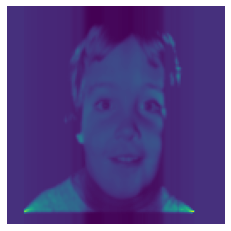

In [10]:
# 未经PCA降维的原图，以第一张图为例，全图
plt.imshow(X[0])
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

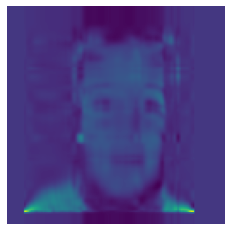

In [11]:
# 将星PCA降维后，还原图像，以第一张图为例，全图
pca = PCA(n_components=9)
x_pca = pca.fit_transform(X[0])
comp = pca.components_
x_m = X[0] - X[0].mean()
np.dot(x_m, np.linalg.pinv(comp))
X0 = np.matmul(x_pca, comp) + X[0].mean()
# print(X[0].shape)
plt.imshow(X0)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

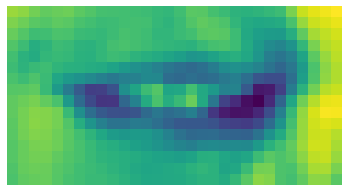

In [12]:
# 未经PCA降维的原图，以第一张图为例，嘴巴
plt.imshow(X_mouth[0])
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

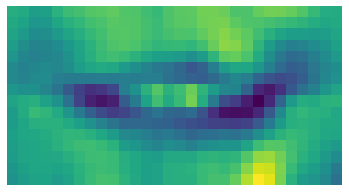

In [13]:
# 将星PCA降维后，还原图像，以第一张图为例， 嘴巴
pca = PCA(n_components=4)
x_mouth_pca = pca.fit_transform(X_mouth[0])
comp = pca.components_
x_mouth_m = X_mouth[0] - X_mouth[0].mean()
np.dot(x_mouth_m, np.linalg.pinv(comp))
x_mouth0 = np.matmul(x_mouth_pca, comp) + X_mouth[0].mean()
plt.imshow(x_mouth0)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

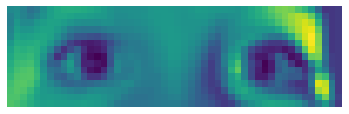

In [14]:
# 未经PCA降维的原图，以第一张图为例，眼睛
plt.imshow(X_eyes[0])
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

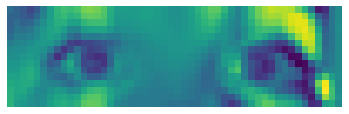

In [15]:
# 将星PCA降维后，还原图像，以第一张图为例， 眼睛
pca = PCA(n_components=12)
x_eyes_pca = pca.fit_transform(X_eyes[0])
comp = pca.components_
x_eyes_m = X_eyes[0] - X_eyes[0].mean()
np.dot(x_eyes_m, np.linalg.pinv(comp))
x_eyes0 = np.matmul(x_eyes_pca, comp) + X_eyes[0].mean()
plt.imshow(x_eyes0)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

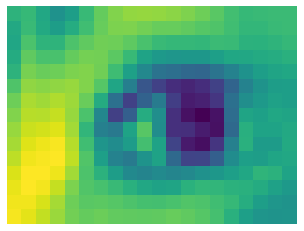

In [16]:
# 未经PCA降维的原图，以第一张图为例，左眼
plt.imshow(X_le[0])
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

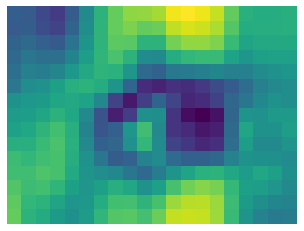

In [17]:
# 将星PCA降维后，还原图像，以第一张图为例， 左眼
pca = PCA(n_components=5)
x_le_pca = pca.fit_transform(X_le[0])
comp = pca.components_
x_le_m = X_le[0] - X_le[0].mean()
np.dot(x_le_m, np.linalg.pinv(comp))
x_le0 = np.matmul(x_le_pca, comp) + X_le[0].mean()
plt.imshow(x_le0)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

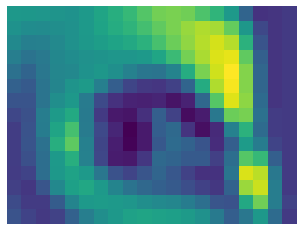

In [18]:
# 未经PCA降维的原图，以第一张图为例，右眼
plt.imshow(X_re[0])
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

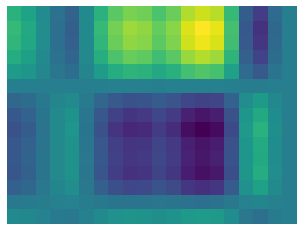

In [19]:
# 将星PCA降维后，还原图像，以第一张图为例， 右眼
pca = PCA(n_components=1)
x_re_pca = pca.fit_transform(X_re[0])
comp = pca.components_
x_re_m = X_re[0] - X_re[0].mean()
np.dot(x_re_m, np.linalg.pinv(comp))
x_re0 = np.matmul(x_re_pca, comp) + X_re[0].mean()
plt.imshow(x_re0)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

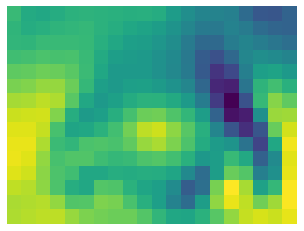

In [20]:
# 未经PCA降维的原图，以第一张图为例，鼻子
plt.imshow(X_nose[0])
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

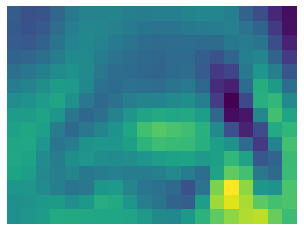

In [21]:
# 将星PCA降维后，还原图像，以第一张图为例， 鼻子
pca = PCA(n_components=7)
x_nose_pca = pca.fit_transform(X_nose[0])
comp = pca.components_
x_nose_m = X_nose[0] - X_nose[0].mean()
np.dot(x_nose_m, np.linalg.pinv(comp))
x_nose0 = np.matmul(x_nose_pca, comp) + X_nose[0].mean()
plt.imshow(x_nose0)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

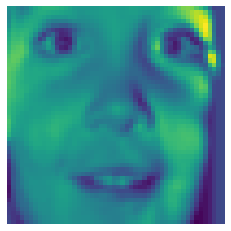

In [22]:
# 未经PCA降维的原图，以第一张图为例，人脸
plt.imshow(X_face[0])
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

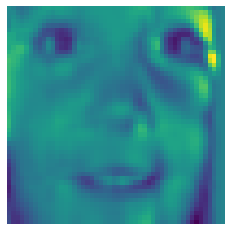

In [23]:
# 将星PCA降维后，还原图像，以第一张图为例， 人脸
pca = PCA(n_components=10)
x_face_pca = pca.fit_transform(X_face[0])
comp = pca.components_
x_face_m = X_face[0] - X_face[0].mean()
np.dot(x_face_m, np.linalg.pinv(comp))
x_face0 = np.matmul(x_face_pca, comp) + X_face[0].mean()
plt.imshow(x_face0)
plt.axis('off')
plt.show

In [ ]:
# Bagging, 嘴巴
from sklearn.ensemble import BaggingClassifier

gnb = GaussianNB(priors=[0.01, 0.99])

clf = BaggingClassifier(gnb, n_estimators=10, max_samples=0.04, max_features=0.42, n_jobs=-1, random_state=42)

Y_mouth_pred = cross_val_predict(clf, X_mouth, Y, cv=5)
print("mouth_score:", accuracy_score(Y, Y_mouth_pred))

# 混淆矩阵
Y_mouth_pred = cross_val_predict(clf, X_mouth, Y, cv=5)
mouth_cm = confusion_matrix(Y, Y_mouth_pred)
print("mouth_confusion_matrix:\n", mouth_cm)

# F1、Percison、Recall、Specifity
mouth_f1 = cross_val_score(clf, X_mouth, Y, cv=5, scoring='f1')
print("mouth_f1: %f" % mouth_f1.mean())
mouth_precision = cross_val_score(clf, X_mouth, Y, cv=5, scoring='precision')
print("mouth_precision: %f" % mouth_precision.mean())
mouth_recall = cross_val_score(clf, X_mouth, Y, cv=5, scoring='recall')
print("mouth_recall: %f" % mouth_recall.mean())
mouth_specifity = mouth_cm[1][1]/(mouth_cm[1][1]+mouth_cm[0][1])
print("mouth_specifity: %f" % mouth_specifity)

# 准确率的平均值和方差
mouth_scores = cross_val_score(clf, X_mouth, Y, cv=5)
print("mouth_scores Accuracy: %0.5f (+/- %0.5f)" % (mouth_scores.mean(), mouth_scores.std() * 2))

#AUC
mouth_scores = cross_val_score(clf, X_mouth, Y, cv=5, scoring='roc_auc')
print("mouth_scores roc_auc: %f" % mouth_scores.mean())

# mouth_score: 0.7264246091780131
# mouth_confusion_matrix:
#  [[1263  716]
#  [ 369 1618]]
# mouth_f1: 0.749067
# mouth_precision: 0.695415
# mouth_recall: 0.814258
# mouth_specifity: 0.693231
# mouth_scores Accuracy: 0.72641 (+/- 0.08032)
# mouth_scores roc_auc: 0.770544

# 调参

# # 确定max_features
# best_score = 0
# k = 0.1
# best_max_features = 0
# for i in range(1,91):
#     clf = BaggingClassifier(GaussianNB(priors=[0.02, 0.98]), n_estimators=10, max_samples=0.5, max_features=k, n_jobs=-1, random_state=42)
#     k += 0.01
#     Y_pred = cross_val_predict(clf, X_mouth, Y, cv=5)
#     scores = cross_val_score(clf, X_mouth, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_max_features = k
        
# print("best_score=", best_score) #0.7188603126575895
# print("best_max_features=", best_max_features) #0.42

# # 确定max_samples
# best_score = 0
# k = 0.01
# best_max_samples = 0
# for i in range(1,98):
#     clf = BaggingClassifier(GaussianNB(priors=[0.01, 0.99]), n_estimators=10, max_samples=k, max_features=0.42, n_jobs=-1, random_state=42)
#     k += 0.01
#     Y_pred = cross_val_predict(clf, X_mouth, Y, cv=5)
#     scores = cross_val_score(clf, X_mouth, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_max_samples = k
        
# print("best_score=", best_score) #0.7264246091780131
# print("best_max_samples=", best_max_samples) #0.04

In [ ]:
# Bagging, 人脸
from sklearn.ensemble import BaggingClassifier

gnb = GaussianNB(priors=[0.57, 0.43])

clf = BaggingClassifier(gnb, n_estimators=10, max_samples=0.26, max_features=0.57, n_jobs=-1, random_state=42)

Y_face_pred = cross_val_predict(clf, X_face_pca, Y, cv=5)
print("mouth_score:", accuracy_score(Y, Y_face_pred))

# 混淆矩阵
Y_face_pred = cross_val_predict(clf, X_face_pca, Y, cv=5)
face_pca_cm = confusion_matrix(Y, Y_face_pred)
print("face_pca_confusion_matrix:\n", face_pca_cm)

# F1、Percison、Recall、Specifity
face_pca_f1 = cross_val_score(clf, X_face_pca, Y, cv=5, scoring='f1')
print("face_pca_f1: %f" % face_pca_f1.mean())
face_pca_precision = cross_val_score(clf, X_face_pca, Y, cv=5, scoring='precision')
print("face_pca_precision: %f" % face_pca_precision.mean())
face_pca_recall = cross_val_score(clf, X_face_pca, Y, cv=5, scoring='recall')
print("face_pca_recall: %f" % face_pca_recall.mean())
face_pca_specifity = face_pca_cm[1][1]/(face_pca_cm[1][1]+face_pca_cm[0][1])
print("face_pca_specifity: %f" % face_pca_specifity)

# 准确率的平均值和方差
face_pca_scores = cross_val_score(clf, X_face_pca, Y, cv=5)
print("face_pca_scores Accuracy: %0.5f (+/- %0.5f)" % (face_pca_scores.mean(), face_pca_scores.std() * 2))

# AUC
face_scores = cross_val_score(clf, X_face_pca, Y, cv=5, scoring='roc_auc')
print("face_pca_scores roc_auc: %f" % face_pca_scores.mean())

# mouth_score: 0.6464952092788704
# face_pca_confusion_matrix:
#  [[1257  722]
#  [ 709 1278]]
# face_pca_f1: 0.638362
# face_pca_precision: 0.641298
# face_pca_recall: 0.643108
# face_pca_specifity: 0.639000
# face_pca_scores Accuracy: 0.63917 (+/- 0.11914)
# face_pca_scores roc_auc: 0.639167

# 调参
# # 确定max_features
# best_score = 0
# k = 0.1
# best_max_features = 0
# for i in range(1,91):
#     clf = BaggingClassifier(GaussianNB(priors=[0.57, 0.43]), n_estimators=10, max_samples=0.5, max_features=k, n_jobs=-1, random_state=42)
#     k += 0.01
#     scores = cross_val_score(clf, X_face_pca, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_max_features = k
        
# print("best_score=", best_score) #0.6422087745839636
# print("best_max_features=", best_max_features) #0.57

# # 确定max_samples
# best_score = 0
# k = 0.01
# best_max_samples = 0
# for i in range(1,98):
#     clf = BaggingClassifier(GaussianNB(priors=[0.57, 0.43]), n_estimators=10, max_samples=k, max_features=0.57, n_jobs=-1, random_state=42)
#     k += 0.01
#     scores = cross_val_score(clf, X_face_pca, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_max_samples = k
        
# print("best_score=", best_score) #0.6464952092788704
# print("best_max_samples=", best_max_samples) #0.26

In [ ]:
# Boosting, 嘴巴
from sklearn.ensemble import AdaBoostClassifier

gnb = GaussianNB(priors=[0.01, 0.99])

clf = AdaBoostClassifier(base_estimator=gnb, n_estimators=10, learning_rate=0.41, random_state=42, algorithm='SAMME')

Y_mouth_pred = cross_val_predict(clf, X_mouth, Y, cv=5)
print("mouth_score:", accuracy_score(Y, Y_mouth_pred))

# 混淆矩阵
Y_mouth_pred = cross_val_predict(clf, X_mouth, Y, cv=5)
mouth_cm = confusion_matrix(Y, Y_mouth_pred)
print("mouth_pca_confusion_matrix:\n", mouth_cm)

# F1、Percison、Recall、Specifity
mouth_f1 = cross_val_score(clf, X_mouth, Y, cv=5, scoring='f1')
print("mouth_f1: %f" % mouth_f1.mean())
mouth_precision = cross_val_score(clf, X_mouth, Y, cv=5, scoring='precision')
print("mouth_precision: %f" % mouth_precision.mean())
mouth_recall = cross_val_score(clf, X_mouth, Y, cv=5, scoring='recall')
print("mouth_recall: %f" % mouth_recall.mean())
mouth_specifity = mouth_cm[1][1]/(mouth_cm[1][1]+mouth_cm[0][1])
print("mouth_specifity: %f" % mouth_specifity)

# 准确率的平均值和方差
mouth_scores = cross_val_score(clf, X_mouth, Y, cv=5)
print("mouth_scores Accuracy: %0.5f (+/- %0.5f)" % (mouth_scores.mean(), mouth_scores.std() * 2))

#AUC
mouth_scores = cross_val_score(clf, X_mouth, Y, cv=5, scoring='roc_auc')
print("mouth_scores roc_auc: %f" % mouth_scores.mean())

# mouth_score: 0.7655068078668684
# mouth_pca_confusion_matrix:
#  [[1291  688]
#  [ 242 1745]]
# mouth_f1: 0.790338
# mouth_precision: 0.722326
# mouth_recall: 0.878172
# mouth_specifity: 0.717222
# mouth_scores Accuracy: 0.76548 (+/- 0.09554)
# mouth_scores roc_auc: 0.809923


# 调参
# best_score = 0
# k = 0.1

# # 确定learning_rate
# best_learning_rate = 0
# for i in range(1,90):
#     clf = AdaBoostClassifier(base_estimator=GaussianNB(priors=[0.01, 0.99]), n_estimators=10, learning_rate=k, random_state=42, algorithm='SAMME')
#     k += 0.01
#     scores = cross_val_score(clf, X_mouth, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_learning_rate = k
        
# print("best_score=", best_score) #0.7655068078668684
# print("best_learning_rate=", best_learning_rate) #0.41

In [ ]:
# Boosting, 人脸
from sklearn.ensemble import AdaBoostClassifier

gnb = GaussianNB(priors=[0.57, 0.43])

clf = AdaBoostClassifier(base_estimator=gnb, n_estimators=10, learning_rate=0.28, random_state=42, algorithm='SAMME')

Y_face_pred = cross_val_predict(clf, X_face_pca, Y, cv=5)
print("face_pca_score:", accuracy_score(Y, Y_face_pred))

# 混淆矩阵
Y_face_pred = cross_val_predict(clf, X_face_pca, Y, cv=5)
face_pca_cm = confusion_matrix(Y, Y_face_pred)
print("face_pca_confusion_matrix:\n", face_pca_cm)

# F1、Percison、Recall、Specifity
face_pca_f1 = cross_val_score(clf, X_face_pca, Y, cv=5, scoring='f1')
print("face_pca_f1: %f" % face_pca_f1.mean())
face_pca_precision = cross_val_score(clf, X_face_pca, Y, cv=5, scoring='precision')
print("face_pca_precision: %f" % face_pca_precision.mean())
face_pca_recall = cross_val_score(clf, X_face_pca, Y, cv=5, scoring='recall')
print("face_pca_recall: %f" % face_pca_recall.mean())
face_pca_specifity = face_pca_cm[1][1]/(face_pca_cm[1][1]+face_pca_cm[0][1])
print("face_pca_specifity: %f" % face_pca_specifity)

# 准确率的平均值和方差
face_pca_scores = cross_val_score(clf, X_face_pca, Y, cv=5, scoring='accuracy')
print("face_pca_scores Accuracy: %0.5f (+/- %0.5f)" % (face_pca_scores.mean(), face_pca_scores.std() * 2))

# AUC
face_scores = cross_val_score(clf, X_face_pca, Y, cv=5, scoring='roc_auc')
print("face_pca_scores roc_auc: %f" % face_pca_scores.mean())

# face_pca_score: 0.7138174483106404
# face_pca_confusion_matrix:
#  [[1406  573]
#  [ 562 1425]]
# face_pca_f1: 0.715133
# face_pca_precision: 0.716133
# face_pca_recall: 0.717145
# face_pca_specifity: 0.713213
# face_pca_scores Accuracy: 0.71381 (+/- 0.05649)
# face_pca_scores roc_auc: 0.713808


# 调参
# best_score = 0
# k = 0.01

# # 确定learning_rate
# best_learning_rate = 0
# for i in range(1,98):
#     clf = AdaBoostClassifier(base_estimator=GaussianNB(priors=[0.57, 0.43]), n_estimators=10, learning_rate=k, random_state=42, algorithm='SAMME')
#     k += 0.01
#     scores = cross_val_score(clf, X_face_pca, Y, cv=5, scoring="accuracy")
#     print("k=",k, "scores=",scores.mean())
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_learning_rate = k
        
# print("best_score=", best_score) #0.7138174483106404
# print("best_learning_rate=", best_learning_rate) #0.28